In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

FILE_PATH = "./datasets/sachs/"

## Load and create data matrix

In [2]:
df = pd.read_csv(FILE_PATH + "sachs.data.txt", sep="\t")
X = df.to_numpy()

print(df.head())

    Raf   Mek   Plcg   PIP2   PIP3    Erk   Akt    PKA    PKC   P38   Jnk
0  26.4  13.2   8.82  18.30  58.80   6.61  17.0  414.0  17.00  44.9  40.0
1  35.9  16.5  12.30  16.80   8.13  18.60  32.5  352.0   3.37  16.5  61.5
2  59.4  44.1  14.60  10.20  13.00  14.90  32.5  403.0  11.40  31.9  19.5
3  73.0  82.8  23.10  13.50   1.29   5.83  11.8  528.0  13.70  28.6  23.1
4  33.7  19.8   5.19   9.73  24.80  21.10  46.1  305.0   4.66  25.7  81.3


## Create DAG

In [3]:
# Graph constructed from the figure in https://www.bnlearn.com/research/sachs05/
## Including only strong conexions (causal conexions confirmed via interventional experiments)
edges = [
    ('Raf', 'Mek'), ('Mek', 'Erk'), ('Plcg', 'PIP2'), ('Plcg', 'PIP3'),
    ('PIP3', 'PIP2'), ('Erk', 'Akt'), ('PKA', 'Raf'), ('PKA', 'Mek'),
    ('PKA', 'Akt'), ('PKA', 'Erk'), ('PKA', 'P38'), ('PKA', 'Jnk'),
    ('PKC', 'PKA'), ('PKC', 'Raf'), ('PKC', 'P38'), ('PKC', 'Jnk'),
    ('PKC', 'Mek')
]

weak_edges = [
    ('Plcg', 'PKC'), ('PIP3', 'Akt'), ('PIP2', 'PKC')
]

# Node order as in data matrix
node_order = ['Raf', 'Mek', 'Plcg', 'PIP2', 'PIP3', 'Erk', 'Akt', 'PKA', 'PKC', 'P38', 'Jnk']

# Create DAG with strong edges
G = nx.DiGraph()
G.add_edges_from(edges)
A_matrix = nx.to_numpy_array(G, nodelist=node_order).T

G_all = G.copy()
G_all.add_edges_from(weak_edges)
A_matrix_all = nx.to_numpy_array(G_all, nodelist=node_order).T

## Plot graphs

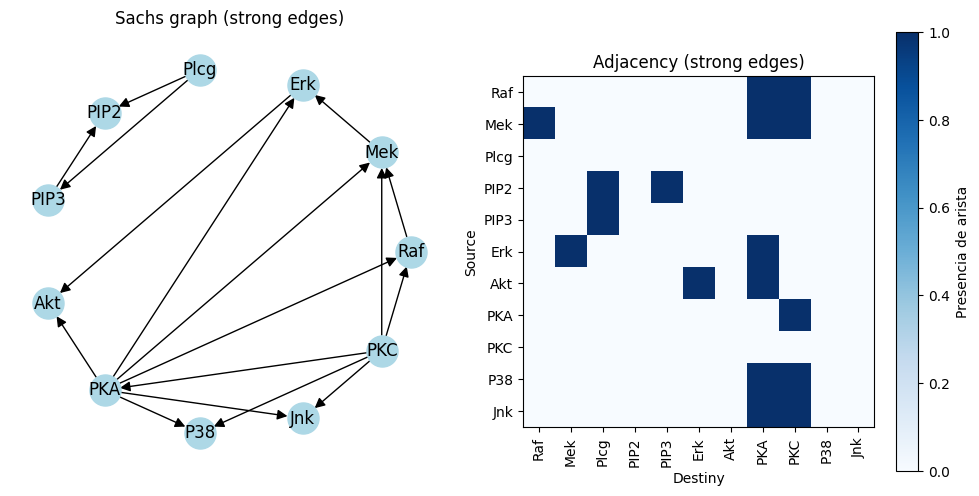

In [4]:
# Plot gaph and adjacency with only strong edges
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', arrowsize=15, ax=ax1)
ax1.set_title("Sachs graph (strong edges)")
ax1.axis("off")

im = ax2.imshow(A_matrix, cmap='Blues', interpolation='none')
fig.colorbar(im, ax=ax2, label='Presencia de arista')

ax2.set_xticks(np.arange(len(node_order)))
ax2.set_yticks(np.arange(len(node_order)))
ax2.set_xticklabels(node_order, rotation=90)
ax2.set_yticklabels(node_order)
ax2.set_title("Adjacency (strong edges)")
ax2.set_xlabel("Destiny")
ax2.set_ylabel("Source")

plt.tight_layout()
plt.show()

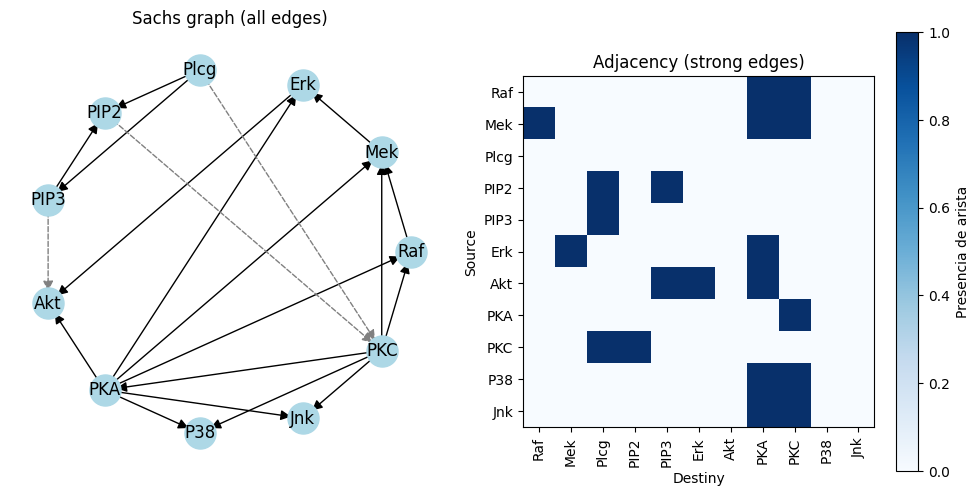

In [5]:
# Plot gaph and adjacency with all edges
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
pos = nx.circular_layout(G_all)
nx.draw_networkx_nodes(G_all, pos, ax=ax1, node_size=500, node_color='lightblue')
nx.draw_networkx_labels(G_all, pos, ax=ax1)
nx.draw_networkx_edges(G_all, pos, ax=ax1, edgelist=edges, arrows=True, arrowsize=15, arrowstyle='-|>', edge_color='black')
nx.draw_networkx_edges(G_all, pos, ax=ax1, edgelist=weak_edges, arrows=True, arrowsize=15, arrowstyle='-|>', edge_color='gray', style='dashed')

ax1.set_title("Sachs graph (all edges)")
ax1.axis("off")

im = ax2.imshow(A_matrix_all, cmap='Blues', interpolation='none')
fig.colorbar(im, ax=ax2, label='Presencia de arista')

ax2.set_xticks(np.arange(len(node_order)))
ax2.set_yticks(np.arange(len(node_order)))
ax2.set_xticklabels(node_order, rotation=90)
ax2.set_yticklabels(node_order)
ax2.set_title("Adjacency (strong edges)")
ax2.set_xlabel("Destiny")
ax2.set_ylabel("Source")

plt.tight_layout()
plt.show()

## Save data

In [6]:
np.save(FILE_PATH + "sachs_X.npy", X)
np.save(FILE_PATH + "node_order.npy", node_order)
np.save(FILE_PATH + "sachs_A_matrix.npy", A_matrix)
np.save(FILE_PATH + "sachs_A_matrix_all.npy", A_matrix_all)